# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.030510e+01     7.432698e+00
 * time: 0.002154111862182617
     1     2.773491e+01     4.924685e+00
 * time: 0.008651971817016602
     2     2.068043e+01     5.156083e+00
 * time: 0.016067981719970703
     3     1.412842e+01     4.003342e+00
 * time: 0.02326202392578125
     4     1.051106e+01     1.642590e+00
 * time: 0.030375003814697266
     5     9.729837e+00     2.430897e+00
 * time: 0.03661203384399414
     6     9.179814e+00     1.107748e+00
 * time: 0.04351210594177246
     7     8.768651e+00     1.151064e+00
 * time: 0.04989790916442871
     8     8.422692e+00     8.709286e-01
 * time: 0.05603909492492676
     9     8.220272e+00     8.208466e-01
 * time: 0.062293052673339844
    10     8.106111e+00     7.763857e-01
 * time: 0.06859493255615234
    11     8.014310e+00     6.679530e-01
 * time: 0.07449197769165039
    12     7.941623e+00     6.436383e-01
 * time: 0.08085203170776367
    13     7.928102e+00     6.557032e-01
 * 

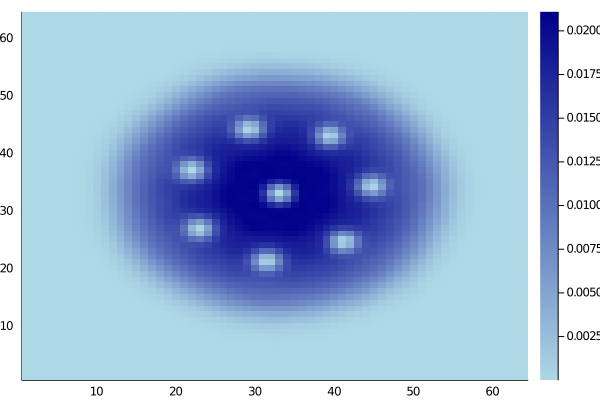

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)